In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import io
import numpy as np

In [2]:
image1 = cv.cvtColor(cv.imread("coins1.png"), cv.COLOR_BGR2GRAY)
image2 = cv.cvtColor(cv.imread("coins2.png"), cv.COLOR_BGR2GRAY)
image3 = cv.cvtColor(cv.imread("coins3.png"), cv.COLOR_BGR2GRAY)

In [117]:
paddedImage1 = np.array(cv.copyMakeBorder(image1, 1, 1, 1, 1, cv.BORDER_CONSTANT, value= [0]))
paddedImage2 = cv.copyMakeBorder(image2, 1, 1, 1, 1, cv.BORDER_CONSTANT, value= [0])
paddedImage3 = cv.copyMakeBorder(image3, 1, 1, 1, 1, cv.BORDER_CONSTANT, value= [0])
imageDictionary = {
    "coins": [paddedImage1, paddedImage2, paddedImage3],
    "dx": [],
    "dy": [],
    "magnitude": [],
    "gradient": [],
    "thresh": []
}
kernelx = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
kernely = np.array([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]])
#assumes image is padded and returns a convoluted non-padded image
def convolute(image, kernel):
    convolutedImage = np.zeros((image.shape[0]-1, image.shape[1]-1))
    for row in range(1, len(image)-1):
        for col in range(1, len(image[row])-1):
            section = np.array(([image[row-1][col-1], image[row-1][col], image[row-1][col+1]], 
                               [image[row][col-1], image[row][col], image[row][col+1]],
                               [image[row+1][col-1], image[row+1][col], image[row+1][col+1]]))
            x = section*kernel * 1/9
            convolutedImage[row][col] = np.sum(x)
    return convolutedImage
            
         
def magnitude(dx, dy):
    finald = np.sqrt(dx**2 + dy**2)
    return(finald)


def gradient(derx, dery):
    dx = np.zeros(derx.shape)
    dy = np.zeros(derx.shape)
    np.copyto(dx, derx)
    np.copyto(dy, dery)
    for row in range(len(dx)):
        for col in range(len(dx[row])):
            try:
                dx[row][col] = np.arctan(dy[row][col]/dx[row][col])
            except Exception:
                dx[row][col] = 0
    return dx

def sobelAdd(image, index):
    dx = convolute(image, kernelx)
    cv.imwrite("dx"+str(index)+".png", dx)
    imageDictionary["dx"].append(dx)
    dy = convolute(image, kernely)
    imageDictionary["dy"].append(dy)
    cv.imwrite("dy"+str(index)+".png", dy)
    mag = magnitude(dx, dy)   
    imageDictionary["magnitude"].append(mag)
    cv.imwrite("magnitude"+str(index)+".png", mag)
    grad = gradient(dx, dy)   
    imageDictionary["gradient"].append(grad)
    cv.imwrite("gradient"+str(index)+".png", grad)
    

for coin in range (len(imageDictionary["coins"])):
    sobelAdd(imageDictionary["coins"][coin], coin)
    


/Users/juanquintero/miniconda3/envs/imageProcessing/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars
/Users/juanquintero/miniconda3/envs/imageProcessing/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in double_scalars


In [179]:
x = 0
imageDictionary["thresh"] = []

for i in imageDictionary["magnitude"]:
    copy = np.zeros(i.shape)
    np.copyto(copy, i)
    for row in range(len(copy)):
        for col in range(len(copy[0])):
            if copy[row][col] > 35:
                copy[row][col] = 255
            else:
                copy[row][col] = 0
    imageDictionary["thresh"].append(copy)
    cv.imwrite("ThresholdedImg" + str(x) +".png", copy)
    x+=1
    

In [186]:
def houghHough(image, threshold, gradient):
    #x, y, r
    hough = np.zeros((len(image), len(image[0]), threshold))
    for x in range(0, len(image), 1):
        for y in range(0, len(image[0]), 1):
            if image[x][y] == 255:
                for r in range(35, threshold, 1): 
                    x0 = int(round(x + r * np.cos(gradient[x][y])))
                    x1 = int(round(x - r * np.cos(gradient[x][y])))
                    y0 = int(round(y + r * np.sin(gradient[x][y])))
                    y1 = int(round(y - r * np.sin(gradient[x][y])))
                    

                    try:
                        hough[x0][y0][r] += 1
                    except Exception:
                        pass
                    try:
                        
                        hough[x0][y1][r] += 1
            
                    except Exception:
                        pass
                    try:

                        hough[x1][y0][r] += 1
                    except Exception:
                        pass
                    try:
                        hough[x1][y1][r] += 1
                    except Exception:
                        pass
                                     
                           

    circles = []
    for y in range(len(image[0])):
        for x in range(len(image)):
            for r in range(threshold):
                if hough[x][y][r] > 7:
                    circles.append((x, y, r))
    return circles
                     
    
                
                
    
    

hough = houghHough(imageDictionary["thresh"][1], 70, imageDictionary["gradient"][1])
print(len(hough))

52


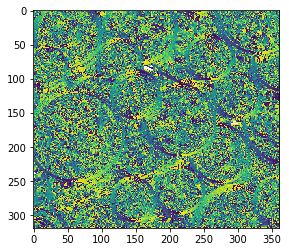

In [139]:
plt.imshow(imageDictionary["gradient"][1])

In [187]:
trial = np.zeros(imageDictionary["magnitude"][1].shape)
np.copyto(trial,imageDictionary["magnitude"][1])
for x in hough:
    cv.circle(trial, (x[0], x[1]), x[2], 255, thickness=1, lineType=8, shift=0)
cv.imwrite("Trial" + ".png", trial)

    

True

In [ ]:
cv.

In [93]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [1]:
print((imageDictionary["thresh"].shape))

NameError: name 'imageDictionary' is not defined